# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Avaliação</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [ ]:
import glob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo. O documento contendo a string com o maior número de caracteres é:

a) gr7<br>
b) au2 <br>
c) ch5<br>
d) au8

In [16]:
# Lendo o documento como uma string
import glob  # glob é um pacote que permite varrer arquivos e 
             # diretorios utilizando sintaxe linux

files = glob.glob("DocCol2/*")

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split('/')[-1]
        docs[key] = f.read() 
        
len_docs = {k:len(s) for k,s in docs.items()}
arg_max = np.argmax(list(len_docs.values()))
print(arg_max)
print('The file with the most characters is: ', list(len_docs.keys())[arg_max])
print('The file lengh of the file is:', list(len_docs.values())[arg_max])

64
The file with the most characters is:  au2
The file lengh of the file is: 11672


### Exercício 2)
Crie um dicionário chamado `docsXwords` onde as chaves são os nomes dos arquivos e os valores são as listas de palavras do documento correspondente. As palavras em cada uma das listas devem ser constituídas apenas por letras do alfabeto, estarem lexicamente normalizadas e conterem mais que 1 caracter. Qual o documento cuja lista de palavras  resultante possui o **maior** número de palavras (lexicamente normalizadas) repetidas:

a) gr22<br>
b) ch30<br>
c) au1<br>
d) au8

In [38]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
docsXwords = {}
docsXwordsCounter = {}

for key, value in docs.items():
    words = nltk.word_tokenize(value)
    words = [w.lower() for w in words if w.isalpha() and len(w) > 1]
    #words = [w for w in words if w not in stop_words]
    words = [PorterStemmer().stem(w) for w in words]
    docsXwords[key] = words
    docsXwordsCounter[key] = dict(Counter(words))
max_repetition_doc = ''
max_word_count = 0
for key in docsXwordsCounter.keys():
    for wordCount in docsXwordsCounter[key].values():
        if (wordCount > max_word_count):
            max_word_count = wordCount
            max_repetition_doc = key
print(max_repetition_doc)
print(max_word_count)

ch30
200


### Exercício 3)
Utilizando as listas de palavras do dicionário `docsXwords`, quais as três palavras que mais aparecem na coleção de documentos:

a) the, is, of<br>
b) that, is, of<br>
c) the, of, to <br>
d) to, is, of

In [48]:
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

df_dXp = pd.DataFrame(data=np.zeros((len(list(docs.keys())),len(corpus))),
                      index = list(docs.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
max_args = np.argsort(df_dXp.sum(axis=0).values)[-3:]
print(df_dXp.columns[max_args])
print(max_args)

Index(['to', 'of', 'the'], dtype='object')
[3436 3273 6485]


### Exercício 4)
Qual o documento cuja lista de palavras possui o **menor** número de "stop words"? Quantas "stop words" aparecem neste documento:

a) gr5 com 47 "stop words"<br>
b) gr17 com 47 "stop words"<br>
c) gr5 com 37 "stop words"<br>
d) gr17 com 37 "stop words"

**Dica**: Crie um dicionário a partir de docsXwords onde a chave é o nome do documento e o valor o número de stop words no documento.

In [57]:
min_repetition_doc = ''
min_word_count = 100
stop_word_dict = {}
for key in docsXwords.keys():
    stop_word_dict[key] = 0
    for word in docsXwords[key]:
        if (word in stop_words):
            stop_word_dict[key] += 1
arg_min = np.argmin(list(stop_word_dict.values()))
arg_min_name = list(stop_word_dict.keys())[arg_min]
print(arg_min)
print(arg_min_name, stop_word_dict[arg_min_name])

15
gr5 47


### Exercício 5) 
Utilize o dicionário `docsXwords` para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos do diretório `DocCol2`. Utilizando a distância cosseno, qual é o documento mais parecido com o documento 'ch7':

a) ch8<br>
b) ch16<br>
c) ch5<br>
d) au8

Documento mais parecido com ch7:  ch16
{'ch': 0, 'gr': 1, 'au': 8}


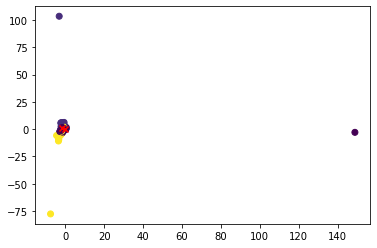

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

ch7_id = np.argwhere(df_dXp.index.values=='ch7')[0][0]

X = df_dXp.values
X = StandardScaler().fit_transform(X)

# calculando o cosseno utilizando a formula
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosch7 = np.apply_along_axis(lambda x: 
             np.dot(X[ch7_id],x)/(np.linalg.norm(ch7_id)*np.linalg.norm(x)),1,X)

# ordenando e pegando o maior valor (note que o elemento [-1] é o 
# próprio documento ch7)
sim_ch7_id = np.argsort(cosch7)[-2]
print('Documento mais parecido com ch7: ',df_dXp.index.values[sim_ch7_id])



# encontrando as classes dos documentos a partir das iniciais dos
# nomes dos documentos
docid = {}
for i,c in enumerate(df_dXp.index.values):
   if c[0:2] not in docid:
      docid[c[0:2]] = i
        
print(docid)
        
doc_class = [docid[c[0:2]] for c in df_dXp.index.values]

X = df_dXp.values
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)
# ch7 e o documento mais parecido estão marcos com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)
plt.scatter(Xpca[[ch7_id,sim_ch7_id],0],Xpca[[ch7_id,sim_ch7_id],1],marker='x',color='r')